# Deformación Lagrangiana

**Objetivo general.**

Implementar un algoritmo que realice el seguimiento de formas geométricas dentro de un flujo.

**Objetivos particulares**
- Definir un fujo dentro de un cuadrado unitario.
- Dibujar un conjunto de círculos iniciales.
- Darles seguimientos a los círculos usando el método de Euler.

## Contenido
- [1. Descripción.](#1)
- [Ejercicio 1.](#ej-1)
    - [Lista de cotejo](#ej-1-lista)
- [Solución](#2)
    - [Definición de los parámetros del problema.](#2-1)
    - [Definición del campo vectorial.](#2-2)
    - [Definición de los círculos iniciales.](#2-3)
    - [Diseño de un algoritmo para el seguimiento de los círculos.](#2-4)
    - [Implementación del algoritmo de solución.](#2-5)
    - [Generar un video en formato MP4 del movimiento generado.](#2-6)


<a name="1"></a>
## Descripción.
Observe el siguiente video.

<table style="width:100%">
  <tr>
    <td style="text-align:center"><video src="../utils/figs/circle_track.mp4" width="320" controls></video></td>
    <td>Cada círculo está conformado por puntos. Estos puntos se mueven siguiendo el movimiento del campo vectorial mostrado con las flechas grises (el flujo). En cada paso de tiempo, los puntos que inicialmente formaban un círculo,  delinean figuras caprichosas. </td>
  </tr>
</table> 

Usando los mismos conceptos descritos en el cuaderno <a href="01_0_MetodoEuler.ipynb">01_0_MetodoEuler.ipynb</a>, es posible definir secciones del fluido y observar como estas secciones se deforman mientras fluyen, simulando por ejemplo, gotas de tinta. 

<a name='ej-1'></a>
## **<font color="DodgerBlue">Ejercicio 1. Deformación de círculos.</font>**

En este ejercicio se simulará la deformación de varios círculos inmersos en un fluido. Usaremos el campo de velocidad definido por las siguientes ecuaciones:

$$
\begin{eqnarray}
u & = & -A \cos(\alpha \pi y) \sin(\alpha \pi x) \\
v & = & A \sin(\alpha \pi y) \cos(\alpha \pi x)
\end{eqnarray}
$$

 para $(x, y) \in [0, 1] \times [0, 1]$.
 
Utilice el pensamiento computacional para diseñar un algoritmo que permita realizar el seguimiento de los $9$ círculos iniciales, los cuales se encuentran dentro de un cuadrado unitario distribuidos como muestra en la siguiente figura y replique el movimiento presentado en el video anterior.

<center>
<img src="../utils/figs/circles_init.png"  width='300px'/>
</center>

---

<a name="ej-1-lista"></a>
### Lista de cotejo.

1. Definición de los parámetros del problema.
2. Definición del campo vectorial.
3. Definición de los círculos iniciales.
4. Diseño de un algoritmo para el seguimiento de los círculos.
5. Implementación del algoritmo de solución.
6. Generar un video en formato MP4 del movimiento generado.

In [1]:
# Importamos las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
from macti.visual import plotFlujo, plotMalla

<a name="2-1"></a>
### Definición de parámetros 

Defina $N_C=9$ número de círculos, $N$ Número de partículas en cada círculo, $N_t$ número de pasos en el tiempo, $h_t = 0.1$. 

In [2]:
# Datos del problema
#NC = ...
#N = ...
#Nt = ...
#ht = ...

### BEGIN SOLUTION
NC = 9    # Número de círculos
N = 500   # Número de partículas en cada círculo
Nt = 80   # Número de pasos temporales
ht = 0.01 # Tamaño del paso de tiempo
### END SOLUTION

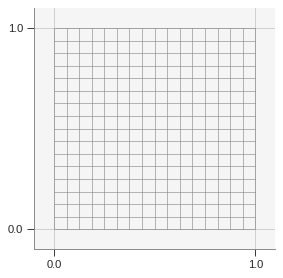

In [3]:
#Tamaño del dominio
ax, bx = (0, 1.0) # Lx
ay, by = (0, 1.0) # Ly

# Definición de la malla
Nx = 15
Ny = 15
x = np.linspace(ax,bx,Nx+2)
y = np.linspace(ay,by,Ny+2)
xg, yg = np.meshgrid(x, y, indexing='ij', sparse=False)

# Graficación de la malla
fig = plt.figure(figsize=(8,4))
plotMalla(xg, yg, marker='')

<a name="2-2"></a>
### Definición  del campo vectorial.

$$
\begin{eqnarray}
u & = & -A \cos(\alpha \pi y) \sin(\alpha \pi x) \\
v & = & A \sin(\alpha \pi y) \cos(\alpha \pi x)
\end{eqnarray}
$$

In [4]:
# Cálculo del campo vectorial.
#A = ...
#α = ...
#u = lambda x, y: ...
#v = lambda x, y:  ...

### BEGIN SOLUTION
A = 1.0
α = 1.0

u = lambda x, y: -A * np.cos(α * np.pi * y) * np.sin(α * np.pi * x)
v = lambda x, y:  A * np.sin(α * np.pi * y) * np.cos(α * np.pi * x)
### END SOLUTION

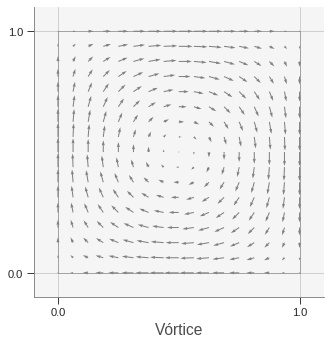

In [5]:
# Verifique que funciona
plotFlujo(xg, yg, u, v, 'quiver', 'Vórtice')

<a name="2-3"></a>
### Definición de los círculos iniciales.

Se necesitan arreglos de tres índice, el primero para el número de puntos ($N$), el segundo para el número de círculos ($N_C$) y el tercero para los pasos de tiempo ($N_t$).

Para cada círculo necesita definir su centro y su radio.

Debe guardar todas las coordenadas en los arreglos `xn[i,c,0]` y `yn[i,c,0]` que serán las condicioens iniciales.

Haga una gráfica para ver que todo salió correctamente

In [9]:
# Definición de los arreglos que contienen las coordenadas de los círculos
#xn = np.zeros(...)
#yn = np.zeros(...)

#Definición de los radios y los centros de los círculos.
#r = ... 
#center = ...

# Cálculo de las coordenadas de cada círculo.
        
### BEGIN SOLUTION
# Definición de los arreglos.
xn = np.zeros((N, NC, Nt+1))
yn = np.zeros((N, NC, Nt+1))

#Definición de los radios y los centros de los círculos.
r = [0.20, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13]
center = [(0.5, 0.5), 
          (0.75, 0.75), (0.25, 0.75), (0.75, 0.25), (0.25, 0.25),
          (0.50, 0.85), (0.50, 0.15), (0.15, 0.50), (0.85, 0.50)]

# Cálculo de las coordenadas de cada círculo.
for c in range(0,NC):
    for i, theta in enumerate(np.linspace(0, 2 * np.pi, N)):
        xn[i, c, 0] = center[c][0] + r[c] * np.cos(theta)
        yn[i, c, 0] = center[c][1] + r[c] * np.sin(theta)
### END SOLUTION

Si todo funciona correctamente, al ejecutar la siguiente celda debera obtener la gráfica del campo vectorial y de los círculos.

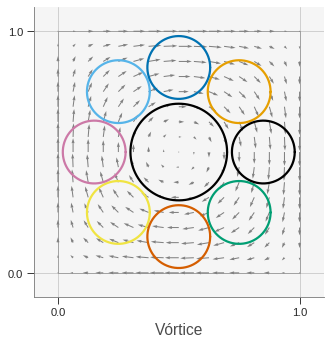

In [10]:
# Si todo salió bien, el siguiente 
plotFlujo(xg, yg, u, v, 'quiver', 'Vórtice')
[plt.plot(xn[:, c, 0], yn[:, c, 0]) for c in range(0,NC)]
plt.savefig('circles_init.png')
plt.show()

<a name="2-4"></a>
### Diseño de un algoritmo para el seguimiento de los círculos.

Diseñe un algoritmo, tómele una foto o screenshot, use el nombre `algoritmo.png` y ponga esa imagen en el directorio `utils/figs`.

<center>
<img src="../utils/figs/algoritmo.png"  width='100px'/>
</center>

<a name="2-5"></a>
### Implementación del algoritmo de solución.

Primero defina la función que implementa el método de Euler hacia adelante.

In [11]:
def euler(x, v, h):
    ### BEGIN SOLUTION
    return x + h * v
    ### END SOLUTION

Implemente el código para el cálculo del seguimiento de los círculos.

In [12]:
# El algoritmo debería contener tres ciclos:
## 1 para el tiempo
## 2 para el círculo a seguir
## 3 para aplicar Euler a las coordenadas de cada círculo

### BEGIN SOLUTION
for n in range(1,Nt+1):
    for c in range(0, NC):
        for i in range(0,N):
            xi = xn[i,c,n-1]
            yi = yn[i,c,n-1]
            xn[i,c,n] = euler(xi, u(xi,yi), ht)
            yn[i,c,n] = euler(yi, v(xi,yi), ht)
### END SOLUTION        

Si todo funciona correctamente, al ejecutar la siguiente celda debera obtener la gráfica del campo vectorial y de los círculos deformados.

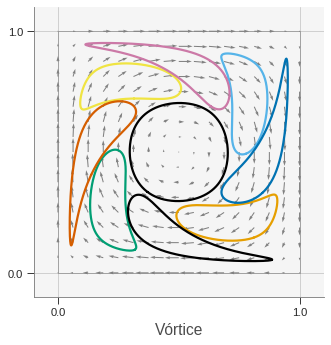

In [13]:
plotFlujo(xg, yg, u, v, 'quiver', 'Vórtice')
for t in range(Nt-1,Nt):
    [plt.plot(xn[:, c, t], yn[:, c, t]) for c in range(0,NC)]

<a name="2-6"></a>
### Generar un video en formato MP4 del movimiento generado.

La siguiente función crea el objeto de la animación `circle_ani`

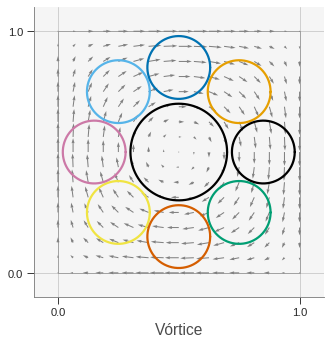

In [14]:
#
# Función para la actualización de los círculos
#
def update_circles(t, circles, x, y):
    for c, circle in enumerate(circles):
        circle[0].set_data(x[:,c,t], y[:,c,t])

plotFlujo(xg, yg, u, v, 'quiver', 'Vórtice')

circles = [plt.plot(xn[:, c, 0], yn[:, c, 0], '-') for c in range(0,NC)]

from matplotlib.animation import FuncAnimation
# Creación del objeto de animación
circle_ani = FuncAnimation(plt.gcf(),
                         update_circles,
                         Nt,
                         fargs=(circles, xn, yn),
                         interval=100,
                         repeat=False)

Guarde la animación en formato MP4. como se explicó en la notebook de la clase <a href="02_SeguimientoLagrangiano.ipynb">02_SeguimientoLagrangiano.ipynb</a>

In [17]:
# Agregue el código para guardar la animación en formato MP4
### BEGIN SOLUTION
from matplotlib.animation import writers
Writer = writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
circle_ani.save('circle_track.mp4', writer=writer)
### END SOLUTION

In [18]:
# Agregue el código para visualizar la animación

### BEGIN SOLUTION
from IPython.display import Video
Video('circle_track.mp4', width=500)
### END SOLUTION